# Model Development

## Importing DataFrames

In [128]:
# Data manipulation
import pandas as pd

# Numerical operations
import numpy as np

# Data visualization
import seaborn as sns

In [129]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

In [130]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [131]:
# Pipline for applying transformations
from sklearn.pipeline import Pipeline

In [132]:
# Import various classifiers for model experimentation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Model evalujation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [134]:
# Export the trained model with joblib
from joblib import dump

## Importing Datasets

In [135]:
train = pd.read_csv("../datasets/KDDTrain.csv")
test = pd.read_csv("../datasets/KDDTest.csv")

## Data Head

In [136]:
train.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   'duration'                     125973 non-null  int64  
 1   'protocol_type'                125973 non-null  object 
 2   'service'                      125973 non-null  object 
 3   'flag'                         125973 non-null  object 
 4   'src_bytes'                    125973 non-null  int64  
 5   'dst_bytes'                    125973 non-null  int64  
 6   'land'                         125973 non-null  int64  
 7   'wrong_fragment'               125973 non-null  int64  
 8   'urgent'                       125973 non-null  int64  
 9   'hot'                          125973 non-null  int64  
 10  'num_failed_logins'            125973 non-null  int64  
 11  'logged_in'                    125973 non-null  int64  
 12  'num_compromised'             

## Data Describe

In [138]:
train.describe()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data pre-processing 

In [139]:
# Calculating missing values count and percentage
missing_values_count = train.isna().sum()
missing_values_percentage = (train.isna().sum() / len(train)) * 100

# Creating a DataFrame to display the missing values statistics
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage (%)': missing_values_percentage
})

# Displaying the DataFrame
missing_values_df

,Missing Values Count,Missing Values Percentage (%)
'duration',0,0.0
'protocol_type',0,0.0
'service',0,0.0
'flag',0,0.0
'src_bytes',0,0.0
'dst_bytes',0,0.0
'land',0,0.0
'wrong_fragment',0,0.0
'urgent',0,0.0
'hot',0,0.0


In [140]:
# Identify duplicate values
duplicates = train[train.duplicated()]

duplicate_count = duplicates.shape[0]
print("Number of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    print("First few duplicate rows:")
    display(duplicates.head())

Number of duplicate rows: 9
First few duplicate rows:


,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
26923,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
34008,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
79815,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
79859,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
106599,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly


In [141]:
# Remove duplicate rows
train = train.drop_duplicates()

In [142]:
# Identify duplicate values
duplicates = train[train.duplicated()]

duplicate_count = duplicates.shape[0]
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


## Class Distribution 

In [143]:
print(train.columns.tolist())

["'duration'", "'protocol_type'", "'service'", "'flag'", "'src_bytes'", "'dst_bytes'", "'land'", "'wrong_fragment'", "'urgent'", "'hot'", "'num_failed_logins'", "'logged_in'", "'num_compromised'", "'root_shell'", "'su_attempted'", "'num_root'", "'num_file_creations'", "'num_shells'", "'num_access_files'", "'num_outbound_cmds'", "'is_host_login'", "'is_guest_login'", "'count'", "'srv_count'", "'serror_rate'", "'srv_serror_rate'", "'rerror_rate'", "'srv_rerror_rate'", "'same_srv_rate'", "'diff_srv_rate'", "'srv_diff_host_rate'", "'dst_host_count'", "'dst_host_srv_count'", "'dst_host_same_srv_rate'", "'dst_host_diff_srv_rate'", "'dst_host_same_src_port_rate'", "'dst_host_srv_diff_host_rate'", "'dst_host_serror_rate'", "'dst_host_srv_serror_rate'", "'dst_host_rerror_rate'", "'dst_host_srv_rerror_rate'", "'class'"]


In [144]:
# Remove leading/trailing quotes from column names
train.columns = train.columns.str.strip("'").str.strip('"')

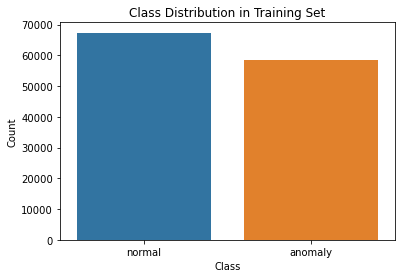

Class distribution Training set:
normal     67343
anomaly    58621
Name: class, dtype: int64


In [145]:
# Plot class distribution
sns.countplot(x=train['class'])
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Show value counts
print("Class distribution Training set:")
print(train['class'].value_counts())

## Dataset Testing & Training

In [146]:
# Select input features
features = ['duration', 'protocol_type', 'src_bytes', 'dst_bytes']
X = train[features]
y = train['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Show resulting sizes
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)

Training set size: (100771, 4) (100771,)
Validation set size: (25193, 4) (25193,)


In [147]:
# Drop validation rows from the full train dataset to isolate test set
features = ['duration', 'protocol_type', 'src_bytes', 'dst_bytes']
X_test = train.drop('class', axis=1)
y_test = train['class']

X_test_val = train.drop(X_test.index).drop('class', axis=1)
y_test_val = train.drop(X_test.index)['class']


# Confirm shapes
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)

(125964, 41) (25193, 4) (125964,) (25193,)


## Feature Selection

In [148]:
# Encode target labels (normal/anomaly) as numeric values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Define numeric input features
numeric_features = ['duration', 'src_bytes', 'dst_bytes']
X_train_numeric = X_train[numeric_features]

# Compute Spearman correlation between features and encoded labels
correlations = X_train_numeric.corrwith(pd.Series(y_train_encoded), method='spearman')

# Sort correlations
sorted_features = correlations.abs().sort_values(ascending=False)

# Display results
print("Correlations with target:")
print(sorted_features)

Correlations with target:
dst_bytes    0.005657
src_bytes    0.005251
duration     0.000997
dtype: float64


## Model Algorithms & Training 

In [149]:
# Define ColumnTransformer to encode 'protocol_type' (categorical feature)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['protocol_type'])
    ],
    remainder='passthrough'  # Leave all other columns untouched
)

# Create ML pipelines with different classifiers
models = {
    "KNN": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    
    "Neural Network": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(random_state=42))
    ]),
    
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
}

In [150]:
# Train all models using the training set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} model trained.")

KNN model trained.
Decision Tree model trained.
Neural Network model trained.
Random Forest model trained.


## Model Algorithms Evaluation 

In [151]:
# Create empty DataFrame to store evaluation metrics
evaluation_metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Loop through each model
for model_name, model in models.items():
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    evaluation_row = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    evaluation_metrics_df = evaluation_metrics_df.append(evaluation_row, ignore_index=True)

# Display the results
evaluation_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.970547,0.971813,0.970547,0.970581
1,Decision Tree,0.971818,0.973184,0.971818,0.971850
2,Neural Network,0.902592,0.910352,0.902592,0.902623
3,Random Forest,0.972175,0.973513,0.972175,0.972207


## Model Benchmarking 

In [152]:
# Sort models by F1 Score in descending order
benchmarking_df = evaluation_metrics_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

# Display the benchmarking results
benchmarking_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.972175,0.973513,0.972175,0.972207
1,Decision Tree,0.971818,0.973184,0.971818,0.971850
2,KNN,0.970547,0.971813,0.970547,0.970581
3,Neural Network,0.902592,0.910352,0.902592,0.902623


## Model Testing 

In [153]:
# Select only the features used during training
features = ['duration', 'protocol_type', 'src_bytes', 'dst_bytes']
X_test_subset = X_test[features]  # Match model input expectations

# Create an empty DataFrame to store test metrics
all_model_test_metrics_df = pd.DataFrame(columns=[
    "Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"
])

# Evaluate each model
for model_name, model in models.items():
    y_test_pred = model.predict(X_test_subset)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    all_model_test_metrics_df = all_model_test_metrics_df.append({
        "Model": model_name,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    }, ignore_index=True)

# Sort models by F1 Score and Accuracy
sorted_test_metrics_df = all_model_test_metrics_df.sort_values(
    by=["Test F1 Score", "Test Accuracy"],
    ascending=False
).reset_index(drop=True)

# Display top model
top_model = sorted_test_metrics_df.iloc[0]
print("Top Performing Model on Test Data:")
print(top_model)
print(f"\nThe best model is: {top_model['Model']}")

Top Performing Model on Test Data:
Model             Random Forest
Test Accuracy          0.973754
Test Precision         0.975073
Test Recall            0.973754
Test F1 Score          0.973784
Name: 0, dtype: object

The best model is: Random Forest


In [154]:
from joblib import dump

# Export the Random Forest model
dump(models["Random Forest"], "random_forest_model.joblib")

['random_forest_model.joblib']

In [159]:
dump(models["Random Forest"], r"C:\Users\Macau\Documents\AI-CyberSecurity-App2025\project\src\Artificial Intelligence\random_forest_model.joblib")

['C:\\Users\\Macau\\Documents\\AI-CyberSecurity-App2025\\project\\src\\Artificial Intelligence\\random_forest_model.joblib']

In [160]:
X_test.to_csv("testdata.csv", index=False)

In [161]:
import pandas as pd

# Load the testdata.csv that was exported from X_test
df = pd.read_csv('testdata.csv')

# Randomly sample 30,000 rows
df_sampled = df.sample(n=30000, random_state=42)

# Save it as a smaller version
df_sampled.to_csv('testdata_small.csv', index=False)